In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [37]:
x_names = ['L%d%c' % (i,c) for i in range(21) for c in ['x','y','z']]
y_names = ['a','s','d','f','None']

col_names = x_names + y_names

df = pd.read_csv("asdf_single_log_long.csv", names=col_names)

In [38]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

C:\Users\Administrator\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
dff = df[x_names]-df[x_names].median()
dff = abs(dff)
dff.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L17z,L18x,L18y,L18z,L19x,L19y,L19z,L20x,L20y,L20z
0,0.009137,0.037422,1.000000e-06,0.020574,0.046727,0.000410,0.026810,0.048990,0.011246,0.025918,...,0.030128,0.057972,0.051990,0.033836,0.087861,0.054683,0.037000,0.114798,0.042458,0.038369
1,0.003190,0.025553,2.100000e-05,0.009284,0.045186,0.010140,0.008069,0.049780,0.001847,0.003329,...,0.008640,0.039346,0.047388,0.028025,0.073545,0.039494,0.055414,0.099223,0.007231,0.085580
2,0.001862,0.037302,7.600000e-05,0.005887,0.044681,0.000104,0.004983,0.052128,0.017188,0.001908,...,0.016626,0.034526,0.048619,0.003805,0.066209,0.044436,0.022016,0.094909,0.019312,0.049458
3,0.002073,0.037419,4.900000e-05,0.002105,0.041028,0.001783,0.000581,0.049471,0.012539,0.007166,...,0.020459,0.033307,0.048861,0.004808,0.067430,0.044384,0.022878,0.098503,0.018855,0.051972
4,0.003427,0.039071,4.700000e-05,0.001829,0.040156,0.004152,0.004194,0.048385,0.010470,0.011366,...,0.031328,0.033913,0.047897,0.017426,0.066278,0.044979,0.009582,0.096718,0.022245,0.039544


In [40]:
dff = pd.DataFrame(dff).to_numpy()
new_df = df.copy()
for c in x_names:     #Left hands
    if c == 'L0x' or c=='L0y' or c=='L0z' :
        continue
    print(c)
    std_ = df[c].std()
    print(std_)
    change = 0
    cc = 0
    for i in range(df.shape[0]):       
        # : replace pre row data
        if (dff[i,cc] > 3*(std_)):
            new_df.iloc[i,:] = new_df.iloc[i-1,:]
            change = change+1
    print('changes number %s:'%c ,change)
    cc = cc+1

L1x
0.008825202746475393
changes number L1x: 0
L1y
0.020404339143519634
changes number L1y: 0
L1z
0.007957236688440983
changes number L1z: 1
L2x
0.01081695213896659
changes number L2x: 0
L2y
0.014385929923493057
changes number L2y: 0
L2z
0.013299797448567484
changes number L2z: 0
L3x
0.013303639806261888
changes number L3x: 0
L3y
0.017963796060600248
changes number L3y: 0
L3z
0.01725943512187959
changes number L3z: 0
L4x
0.018596329208074608
changes number L4x: 0
L4y
0.022906397476418008
changes number L4y: 0
L4z
0.02167538497104001
changes number L4z: 0
L5x
0.010828034434295293
changes number L5x: 0
L5y
0.02467141127071898
changes number L5y: 0
L5z
0.02613800903339779
changes number L5z: 0
L6x
0.01193051336576114
changes number L6x: 0
L6y
0.014850177872407744
changes number L6y: 0
L6z
0.028336131749589228
changes number L6z: 0
L7x
0.01313574400195902
changes number L7x: 0
L7y
0.01375705150166433
changes number L7y: 0
L7z
0.02648381679542125
changes number L7z: 0
L8x
0.0147210687886440

In [41]:
new_df

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.791001,0.033868,-0.000051,0.687616,0.102485,-0.040095,0.623654,0.185545,-0.108957,0.591199,...,0.437036,-0.282023,0.808288,0.486684,-0.293963,0,0,0,0,1.0
1,0.796948,0.022000,-0.000071,0.698906,0.100945,-0.030365,0.642395,0.186335,-0.095864,0.613788,...,0.421846,-0.189610,0.823863,0.451457,-0.170014,0,0,0,0,1.0
2,0.798276,0.033748,-0.000126,0.702303,0.100440,-0.040609,0.645481,0.188683,-0.114899,0.619026,...,0.426788,-0.223007,0.828177,0.463538,-0.206136,0,0,0,0,1.0
3,0.802211,0.033865,-0.000099,0.706085,0.096787,-0.038722,0.649883,0.186026,-0.110250,0.624283,...,0.426736,-0.222145,0.824583,0.463081,-0.203622,0,0,0,0,1.0
4,0.803565,0.035517,-0.000097,0.710019,0.095915,-0.036353,0.654658,0.184940,-0.108181,0.628483,...,0.427331,-0.235441,0.826368,0.466471,-0.216050,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,0.807104,-0.018192,-0.000069,0.721025,0.037767,-0.038414,0.665496,0.127313,-0.092332,0.635363,...,0.367816,-0.265061,0.938869,0.434564,-0.284508,0,0,1,0,0.0
4446,0.809156,-0.015712,-0.000065,0.721813,0.038574,-0.039124,0.665353,0.128773,-0.093798,0.635291,...,0.368828,-0.270593,0.937542,0.435024,-0.290059,0,0,1,0,0.0
4447,0.808367,-0.015807,-0.000062,0.720501,0.039267,-0.041367,0.664938,0.126580,-0.097224,0.634913,...,0.365348,-0.263656,0.939842,0.430564,-0.283384,0,0,1,0,0.0
4448,0.809130,-0.017143,-0.000069,0.722137,0.039420,-0.040470,0.665299,0.127933,-0.095403,0.634318,...,0.371384,-0.263936,0.938949,0.438540,-0.283278,0,0,1,0,0.0


In [42]:
def gamma_smoothing(new_df, gamma=0.4):
    
    new_df = new_df.copy()

    for x in x_names:
        for row in range(1, len(new_df)):
            new_df[x].iloc[row] = new_df[x].iloc[row-1] * (1-gamma) + new_df[x].iloc[row] * gamma

    return new_df

new_df = gamma_smoothing(new_df)
new_df.head()

C:\Users\Administrator\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.791001,0.033868,-0.000051,0.687616,0.102485,-0.040095,0.623654,0.185545,-0.108957,0.591199,...,0.437036,-0.282023,0.808288,0.486684,-0.293963,0,0,0,0,1.0
1,0.793380,0.029121,-0.000059,0.692132,0.101869,-0.036203,0.631150,0.185861,-0.103720,0.600235,...,0.430960,-0.245058,0.814518,0.472593,-0.244383,0,0,0,0,1.0
2,0.795338,0.030972,-0.000086,0.696200,0.101297,-0.037965,0.636883,0.186990,-0.108191,0.607751,...,0.429291,-0.236237,0.819982,0.468971,-0.229084,0,0,0,0,1.0
3,0.798087,0.032129,-0.000091,0.700154,0.099493,-0.038268,0.642083,0.186604,-0.109015,0.614364,...,0.428269,-0.230600,0.821822,0.466615,-0.218899,0,0,0,0,1.0
4,0.800278,0.033484,-0.000093,0.704100,0.098062,-0.037502,0.647113,0.185939,-0.108681,0.620012,...,0.427894,-0.232537,0.823640,0.466557,-0.217760,0,0,0,0,1.0


In [43]:
scaler = MinMaxScaler()
a = scaler.fit_transform(new_df)

In [44]:
b = pd.DataFrame(a, columns=col_names)
b.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.262636,0.778253,0.541216,0.000000,0.642058,0.660829,0.000000,0.653783,0.578958,0.000000,...,0.976395,0.306868,0.248863,0.998930,0.343360,0.0,0.0,0.0,0.0,1.0
1,0.321552,0.732387,0.490268,0.049315,0.637444,0.717974,0.056058,0.656023,0.629071,0.059345,...,0.938779,0.448323,0.270663,0.908364,0.506791,0.0,0.0,0.0,0.0,1.0
2,0.370057,0.750270,0.319594,0.093742,0.633162,0.692097,0.098924,0.664025,0.586283,0.108713,...,0.928447,0.482075,0.289781,0.885083,0.557222,0.0,0.0,0.0,0.0,1.0
3,0.438144,0.761451,0.285968,0.136918,0.619648,0.687654,0.137810,0.661292,0.578404,0.152145,...,0.922120,0.503646,0.296221,0.869940,0.590795,0.0,0.0,0.0,0.0,1.0
4,0.492410,0.774545,0.270888,0.180007,0.608927,0.698901,0.175425,0.656573,0.581595,0.189239,...,0.919796,0.496237,0.302584,0.869570,0.594552,0.0,0.0,0.0,0.0,1.0


In [45]:
x, y = b[x_names], b[y_names]

In [59]:
ratio = 0.9

train_num = int(len(b) * ratio)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

x_train_numpy = x_train.to_numpy()
x_test_numpy = x_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

In [60]:
x_train_t = x_train_numpy.reshape(x_train_numpy.shape[0],63,1)
x_test_t = x_test_numpy.reshape(x_test_numpy.shape[0],63,1)

In [61]:
model = Sequential()

model.add(LSTM(50, input_shape=(63,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                3264      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 325       
Total params: 13,989
Trainable params: 13,989
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x_train_t, y_train, epochs=20)

Epoch 1/20
126/126 [==============================] - 4s 11ms/step - loss: 1.5691 - accuracy: 0.2562
Epoch 2/20
126/126 [==============================] - 1s 11ms/step - loss: 1.2748 - accuracy: 0.4590
Epoch 3/20
126/126 [==============================] - 1s 12ms/step - loss: 1.1576 - accuracy: 0.5362
Epoch 4/20
126/126 [==============================] - 1s 11ms/step - loss: 1.1257 - accuracy: 0.5298
Epoch 5/20
126/126 [==============================] - 2s 12ms/step - loss: 0.9969 - accuracy: 0.5980
Epoch 6/20
126/126 [==============================] - 2s 12ms/step - loss: 0.9872 - accuracy: 0.6059
Epoch 7/20
126/126 [==============================] - 1s 11ms/step - loss: 0.8823 - accuracy: 0.6565
Epoch 8/20
126/126 [==============================] - 1s 11ms/step - loss: 0.8664 - accuracy: 0.6672
Epoch 9/20
126/126 [==============================] - 1s 10ms/step - loss: 0.8460 - accuracy: 0.6563
Epoch 10/20
126/126 [==============================] - 1s 11ms/step - loss: 0.8036 - accura

In [63]:
model.evaluate(x_test_t, y_test, verbose=2)

14/14 - 1s - loss: 0.4085 - accuracy: 0.8876


[0.40852975845336914, 0.8876404762268066]

In [64]:
predict = model.predict(x_test_t)

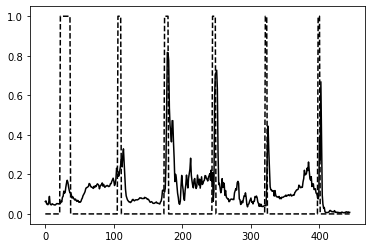

In [65]:
size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4],'k')

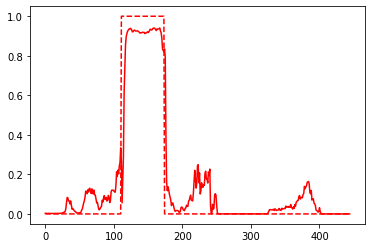

In [66]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0],'r')

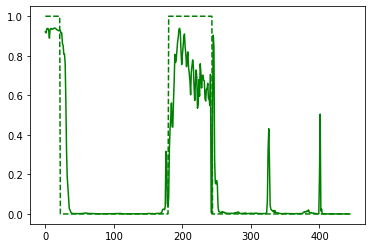

In [67]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1],'g')

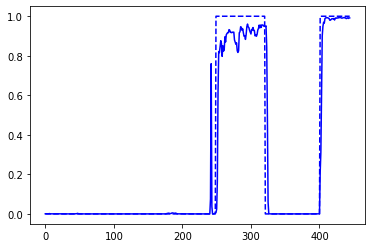

In [68]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2],'b')

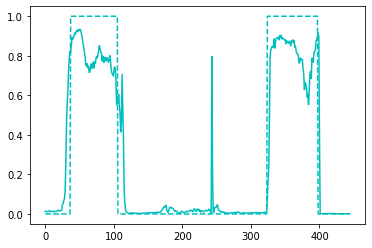

In [69]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3],'c')